<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_07_derivadas.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 7
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por: 


\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo [misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)

3. Calcular el campo para diferentes valores de z con z>0,,  empleando misc derivative. Construya un grafico de E vs z.

4. Entender la generalizacion de la siguiente función, y aplicarla para calcular la derivada.


```python
import numpy as np
from scipy import misc
def derivative(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] ## force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

assert isinstance(derivative(np.sin,1,dx=1E-6),float)

```

# 1.La libreria sympy.


In [ ]:
#El campo eléctrico es -dv/dz
#1) con Libreria de Sympy
import sympy as sp 
z=sp.symbols('z')

In [ ]:
R=0.1e-3 #m
def potential(z,R,kq=1):
  return z*kq/sp.sqrt(z**2+R**2)

In [ ]:
der=sp.diff(potential(z,R),z)
E_=-der

# 2) Calcular el campo en el punto  𝑧=0.1𝑚𝑚  empleando el metodo misc.derivative

In [ ]:
import numpy as np
import matplotlib.pylab as plt 
def potential1(z,R,kq=1):
  return z*kq/np.sqrt(z**2+R**2)

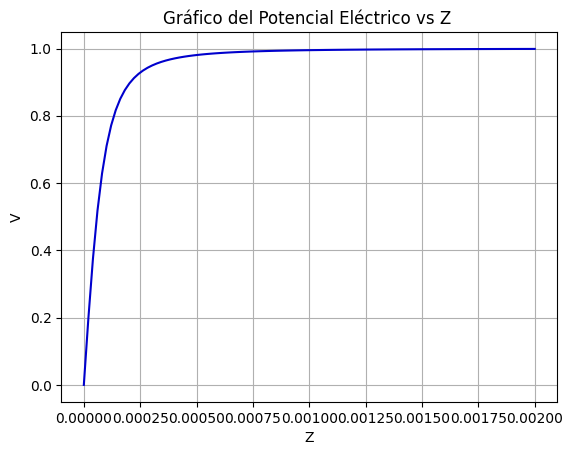

In [ ]:
z=np.linspace(0,0.002,100)
plt.plot(z,potential1(z,R),color='mediumblue')
plt.xlabel('Z')
plt.ylabel('V')
plt.title('Gráfico del Potencial Eléctrico vs Z ')
plt.grid()

In [ ]:
from scipy.misc import derivative
Der_V=derivative(potential1,0.1,dx=1,args=(R,))
E=-Der_V
print(f'El campo Eléctrico en z=0.1 mm es {E}')

El campo Eléctrico en z=0.1 mm es -0.9999999948474646


<ipython-input-25-e92982a06191>:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  Der_V=derivative(potential1,0.1,dx=1,args=(R,))


# 3) Calcular el campo para diferentes valores de z con z>0,, empleando misc derivative. Construya un grafico de E vs z.

In [ ]:
z=np.linspace(0,0.002,100)

In [ ]:
R=0.1e-3 #m

In [ ]:
gradV=derivative(potential1,z,dx=1E-06,args=(R,))
E_z=-gradV

<ipython-input-28-2eaf72d04413>:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  gradV=derivative(potential1,z,dx=1E-06,args=(R,))


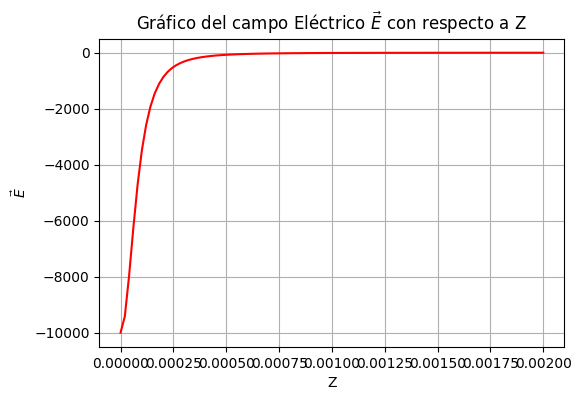

In [ ]:
#Gráfica de E vs Z usando misc.derivative sin vectorizar 
plt.figure(figsize=(6,4))
plt.plot(z,E_z,color='red')
plt.title('Gráfico del campo Eléctrico $\\vec{E}$ con respecto a Z',size=12)  
plt.xlabel('Z')
plt.ylabel('$\\vec{E}$')
plt.grid(True)

In [ ]:
def potential_(z,R,kq=1):
  if (z>=0):
    V=z*kq/np.sqrt(z**2+R**2)
  else:
    V=0
  return V

In [ ]:
#Vectorizando a través de numpy y se vectoriza es la función derivative
derivada=np.vectorize(derivative,excluded=["args"])

In [ ]:
kq=1.0
grad=derivada(potential_,z,dx=1,args=(R,kq))
E_=-grad

In [ ]:
#gráfica de potencial
#plt.plt(z,potential_(z,R,kq))

DISCO

\begin{equation}
V = \frac{q}{\pi R^2}2k\pi \sqrt{z^2+R^2-z}
\end{equation}

In [ ]:
def potencial(z,R,kq,select):
  if (select=='anillo'):
    V=z*kq/np.sqrt(z**2+R**2)
  elif(select=='disco'):
    V=(2*kq/R**2)*(np.sqrt(z**2+R**2)-z)
  else:
    print('Error,la palabra select debe ser anillo o disco')
    V=None
  return V

In [ ]:
potencial(0.001,0.1e-03,kq=1,select='otra cosa ')

Error,la palabra select debe ser anillo o disco


In [ ]:
#Vectorizando a través de numpy y se vectoriza es la función derivative
select='other'
derivada=np.vectorize(derivative,excluded=["args"])
#si select='otra cosa' la funcion fallaria por tanto se deberia usar try-except
try: 
  grad=derivada(potencial,z,dx=1,args=(R,kq,select))
  campoElectrico=-grad
except:
  print('Error, la palabra select debe ser anillo o disco')

Error,la palabra select debe ser anillo o disco
Error, la palabra select debe ser anillo o disco


In [ ]:
#Ahora se realiza un ejecutable .py
# las variables globales son  z,R,kq y select y nos retorna E

In [ ]:
#programa
import numpy as np
from scipy.misc import derivative
z=np.linspace(0,0.002,100)
R=0.1e-03
kq=1
select='disco'

def potencial(z,R,kq,select):
  if (select=='anillo'):
    V=z*kq/np.sqrt(z**2+R**2)
  elif(select=='disco'):
    V=(2*kq/R**2)*(np.sqrt(z**2+R**2)-z)
  else:
    print('Error,la palabra select debe ser anillo o disco')
    V=None
  return V


#Vectorizando a través de numpy y se vectoriza es la función derivative
select='other'
derivada=np.vectorize(derivative,excluded=["args"])
#si select='otra cosa' la funcion fallaria por tanto se deberia usar try-except
try: 
  grad=derivada(potencial,z,dx=1,args=(R,kq,select))
  campoElectrico=-grad
  np.savetxt('campo_electrico.txt',campoElectrico)
except:
  print('Error, la palabra select debe ser anillo o disco')

Error,la palabra select debe ser anillo o disco
Error, la palabra select debe ser anillo o disco


In [ ]:
!ls

sample_data


# 4)Entender la generalizacion de la siguiente función, y aplicarla para calcular la derivada.

In [ ]:
import numpy as np
from scipy import misc

def derivative(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] ## force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative

    return fp(func,x0,**kwargs)

assert isinstance(derivative(np.sin,1,dx=1E-6),float)

<ipython-input-40-e94cb1257445>:19: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return fp(func,x0,**kwargs)
